<a href="https://colab.research.google.com/github/gaiah-11/Repozitorij/blob/main/04_02_2026_drugi_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

Koristan za rad s tabličnim podatcima
Učitavanje, pregled

In [2]:
import pandas as pd


In [3]:
import numpy as np


###pandas series

1D struktura podataka, slično jednom stupcu u tablici

Ima indekse, vrijednosti i može (ali i ne mora) imati ime


In [4]:
list = [1,20,30]
list

[1, 20, 30]

In [6]:
np.array(list)

array([ 1, 20, 30])

In [7]:
pd.Series(list)

,0
0,1
1,20
2,30


In [8]:
#pd series radimo jer je lakse raditi s podatcima takvim, lakse filtriranje, analiza...
#numpy array + indeks + metapodaci


Mogućnost dodjeljivanja indeksa

In [10]:
ind=['a','b','c']
pd.Series(data=list,index=ind, name='heather')

,heather
a,1
b,20
c,30


If we specify a dictionary it will automatically take index values


Ako dictionary pretvaramo u pd series, ključevi će postati indeksi

In [11]:
#dictionary
d = {'a':1,'b':2}
d

{'a': 1, 'b': 2}

In [12]:
#pandas series sa dictionary d
pd.Series(d, name='heather')

,heather
a,1
b,2


In [22]:
#možemo i sve definirati u jednom redu
tab1 = pd.Series(data=[1,2,3], index=['A','B','C'], name='heather')
tab1

,heather
A,1
B,2
C,3


In [15]:
#izdvajanje određene vrijednosti iz pd.series
#pomocu lokacije (broj retka)

tab1[0]
tab1[[0,1]]

/tmp/ipython-input-1087758789.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tab1[0]
/tmp/ipython-input-1087758789.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tab1[[0,1]]


,heather
a,1
b,2


In [23]:
#pomocu indeksa
tab1['B']
tab1[['B','B']]

,heather
B,2
B,2


In [20]:
#zbrajanje pd serije

tab2= pd.Series(data=[2,4,5,6], index=['A','E','C','F'])
tab2

,0
A,2
E,4
C,5
F,6


In [25]:
tab1+tab2

#zbrajaju se samo matching indexes
#ako ne postoji indeks isti u obje serije = NaN

,0
A,3.0
B,NaN
C,8.0
E,NaN
F,NaN


##DataFrame


2D strukrtura u kojoj je svaki stupac jedna Panda Series, a svi stupci dijele isti indeks

In [28]:
np.random.randn(5,4)
#np.random.random() uzima random nasumicne brojeve
#np.random.randn malo drugacije rasprsenje podataka da srednja vrijednost bude 0 cca

array([[ 0.09509179, -0.0155988 ,  0.36628391, -0.46436652],
       [ 0.18248561,  0.56441551,  0.21093   ,  0.5361364 ],
       [ 0.61705854, -0.16894076,  0.6014443 ,  0.19755168],
       [-0.41762815,  0.63570258,  1.07853568, -0.57936548],
       [-0.67362877,  0.83505658,  0.3071692 , -0.24861079]])

In [30]:
from numpy.random import randn #da skrtaskratimo kod

In [53]:
#pandas dataframe s nasumičnim brojevim poredanim u 5 redaka i 4 stupca. retci i stupci trebaju biti imenovani
#prvo se pisu imena redova pa stupaca
df = pd.DataFrame(randn(5,4),
                  index =['A','B','C','D','E'],
                  columns =['W','X','Y','Z'])

df

,W,X,Y,Z
A,1.268048,-0.786733,0.805284,-0.736895
B,-0.670811,1.394778,-2.124440,0.074599
C,-0.152607,-1.205066,0.844590,1.003764
D,-1.847027,0.176405,-2.598922,-0.225918
E,0.998140,0.404190,-0.612067,-1.341849


In [35]:
  #preimenujmo kolone u brojeve 1,2,3 i 4
  df.columns = [1,2,3,4]
  df

,1,2,3,4
A,0.502358,1.762494,0.000563,0.413918
B,0.377722,0.551189,-1.665317,-0.935423
C,-0.130095,0.174855,1.082745,0.105108
D,-0.126724,1.500868,1.808599,-0.040436
B,-1.058585,-0.729004,-2.161343,-0.523511


In [36]:
#vratimo izvorne nazive kolona
df.columns = ['W','X','Y','Z']
df

,W,X,Y,Z
A,0.502358,1.762494,0.000563,0.413918
B,0.377722,0.551189,-1.665317,-0.935423
C,-0.130095,0.174855,1.082745,0.105108
D,-0.126724,1.500868,1.808599,-0.040436
B,-1.058585,-0.729004,-2.161343,-0.523511


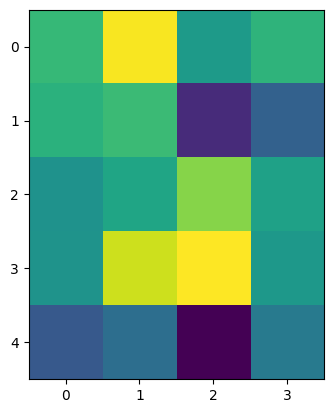

In [37]:
import matplotlib.pyplot as plt
plt.imshow(df)

##dohvacanje odredenih vrijednosti: .loc i .iloc

.loc dohvaca se vrijednost prema oznakama (labels) redova ili stupaca

.iloc duhvaca se prema poziciji zeljenih vrijednosti


In [38]:
df

,W,X,Y,Z
A,0.502358,1.762494,0.000563,0.413918
B,0.377722,0.551189,-1.665317,-0.935423
C,-0.130095,0.174855,1.082745,0.105108
D,-0.126724,1.500868,1.808599,-0.040436
B,-1.058585,-0.729004,-2.161343,-0.523511


In [39]:
#dohvatimo sve vrijednosti iz prvog retka (index A) pomocu .loc
df.loc['A']

,A
W,0.502358
X,1.762494
Y,0.000563
Z,0.413918


In [40]:
#kojeg tipa je izolirani objekt
type(df.loc['A'])

pandas.core.series.Series

In [41]:
#dohvatimo sve vrijednosti prvog ui treceg stupca pomocu .iloc
df.iloc[:,[0,2]]

,W,Y
A,0.502358,0.000563
B,0.377722,-1.665317
C,-0.130095,1.082745
D,-0.126724,1.808599
B,-1.058585,-2.161343


In [42]:
df

,W,X,Y,Z
A,0.502358,1.762494,0.000563,0.413918
B,0.377722,0.551189,-1.665317,-0.935423
C,-0.130095,0.174855,1.082745,0.105108
D,-0.126724,1.500868,1.808599,-0.040436
B,-1.058585,-0.729004,-2.161343,-0.523511


In [44]:
#dohvatimo vrijednosti koje se naklaze retku C i stupcima Y i Z te vrijednosti iz redaka DF i stupca  Y i Z
#1. nacin
df.iloc[[2,3],[2,3]]

,Y,Z
C,1.082745,0.105108
D,1.808599,-0.040436


In [46]:
# 2.nacin
df[['Y','Z']].loc[['C','D']]

,Y,Z
C,1.082745,0.105108
D,1.808599,-0.040436


In [48]:
df

,W,X,Y,Z
A,0.502358,1.762494,0.000563,0.413918
B,0.377722,0.551189,-1.665317,-0.935423
C,-0.130095,0.174855,1.082745,0.105108
D,-0.126724,1.500868,1.808599,-0.040436
B,-1.058585,-0.729004,-2.161343,-0.523511


In [54]:
#izolirajmo vrijednosti iz stupca W i X te retka B.
#Napravimo od njih dataframe s nazivom 'a'
a=df[['W','X']].loc['B']
pd.DataFrame(a)


,B
W,-0.670811
X,1.394778


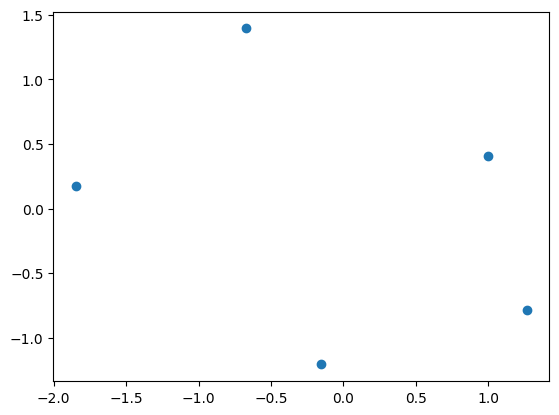

In [55]:
#Od vrijednosti iz stupca W i X napravimo scatter plot
plt.scatter(df['W'],df['X'])

In [58]:
#Izracunajmo st dev iz retka C
df.loc['C'].std()

1.0224407451193178

In [59]:
#varijancu stupca X
df['X'].var()

1.0527432217378614

In [60]:
#izracunajmo st dev retka C i zaokruzimo broj na 3 decimale
round(df.loc['C'].std(),3)

1.022

In [62]:
#od najveceg broja iz stupca W oduzmimo najmanji broj iz stupca Z
df['W'].max()-df['Z'].min()

2.6098965417125592

In [63]:
# Je li st dev stupca X veca od st dev retka D
df['X'].std() > df.loc['D'].std()

False

In [65]:
#Je li najveca vrijednost iz retka C veća od varijance stupca Z
df.loc['C'].max() > df['Z'].var()

True

##Create column

In [73]:
#kreirajmo kolonu koja će sadržati razliku vrijednosti kolona W i Y
df['W']-df['Y']

,0
A,0.462763
B,1.453629
C,-0.997197
D,0.751895
E,1.610207


In [74]:
#dodijelimo naziv toj kolini WminY
df['WminY']=df['W']-df['Y']

In [75]:
df

,W,X,Y,Z,W-Y,WminY
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207


In [76]:
#dodajmo kolonu logx koja ce imati logaritamske vrijednosti kolobe x
df['logx']=np.log(df['X'])
df

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,W,X,Y,Z,W-Y,WminY,logx
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871


In [77]:
#definiramo funkciju koja izracunava ph vrijednost na temelju zadanih konc
def ph(c):
  return -np.log10(c)

In [80]:
#napravimo definiranu funkciju na kolonu
#apply() primjenjuje zadanu funkciju na svaki element series(red/kolona)

df['X'].apply(ph)

/tmp/ipython-input-2028230527.py:3: RuntimeWarning: invalid value encountered in log10
  return -np.log10(c)


,X
A,NaN
B,-0.144505
C,NaN
D,0.753488
E,0.393415


In [82]:
#ista stvar ali bez prethodnog definiranja funkcije pH - lambda
#lambda za svaki element x računa
df['X'].apply(lambda x: -np.log10(x))

/tmp/ipython-input-3244306308.py:3: RuntimeWarning: invalid value encountered in log10
  df['X'].apply(lambda x: -np.log10(x))


,X
A,NaN
B,-0.144505
C,NaN
D,0.753488
E,0.393415


Operacija nad svim elementima dataframe -applymap


Operacija nad jednim stupcem ili jednim retkom - apply

In [85]:
#sve vrijednosti iz dataframe df pomnmozi s 2 i pribroji 100  (applymap)
#future warning - applymap je vec malo zastarjela funkcija
df.applymap(lambda x: 2*x+100)

/tmp/ipython-input-1350020557.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: 2*x+100)


,W,X,Y,Z,W-Y,WminY,logx
A,102.536096,98.426533,101.610569,98.526210,100.925527,100.925527,NaN
B,98.658377,102.789556,95.751120,100.149198,102.907258,102.907258,100.665471
C,99.694786,97.589868,101.689181,102.007528,98.005606,98.005606,NaN
D,96.305947,100.352811,94.802156,99.548164,101.503791,101.503791,96.530059
E,101.996280,100.808379,98.775867,97.316303,103.220414,103.220414,98.188257


In [86]:
#drugi nacin
def fun(x):
  return 2*x+100

df.applymap(fun)

/tmp/ipython-input-3567857060.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(fun)


,W,X,Y,Z,W-Y,WminY,logx
A,102.536096,98.426533,101.610569,98.526210,100.925527,100.925527,NaN
B,98.658377,102.789556,95.751120,100.149198,102.907258,102.907258,100.665471
C,99.694786,97.589868,101.689181,102.007528,98.005606,98.005606,NaN
D,96.305947,100.352811,94.802156,99.548164,101.503791,101.503791,96.530059
E,101.996280,100.808379,98.775867,97.316303,103.220414,103.220414,98.188257


In [87]:
#kvadrirajmo sve vrijednosti iz dataframe
df.applymap(lambda x: x**2)

/tmp/ipython-input-3455240601.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x**2)


,W,X,Y,Z,W-Y,WminY,logx
A,1.607945,0.618949,0.648483,0.543014,0.214150,0.214150,NaN
B,0.449988,1.945406,4.513246,0.005565,2.113037,2.113037,0.110713
C,0.023289,1.452184,0.713333,1.007542,0.994402,0.994402,NaN
D,3.411507,0.031119,6.754396,0.051039,0.565347,0.565347,3.010123
E,0.996284,0.163369,0.374626,1.800558,2.592766,2.592766,0.820603


In [88]:
#definirajmo funkciju koja ce nam odredivati jesu li zadane vrijednosti iznad LOD (limit of detection)
#LOD=0.01
def above_LOD(x):
  if x > 0.01:
    return 'above LOD'
  else:
    return 'XXX'

In [89]:
above_LOD(0.001)

'XXX'

In [90]:
above_LOD(0.02)

'above LOD'

In [91]:
#primjenimo above_LOD fzunkciju na cijeli dataframe
df.applymap(above_LOD)

/tmp/ipython-input-3059072389.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(above_LOD)


,W,X,Y,Z,W-Y,WminY,logx
A,above LOD,XXX,above LOD,XXX,above LOD,above LOD,XXX
B,XXX,above LOD,XXX,above LOD,above LOD,above LOD,above LOD
C,XXX,XXX,above LOD,above LOD,XXX,XXX,XXX
D,XXX,above LOD,XXX,XXX,above LOD,above LOD,XXX
E,above LOD,above LOD,XXX,XXX,above LOD,above LOD,XXX


In [92]:
df

,W,X,Y,Z,W-Y,WminY,logx
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871


In [97]:
#stvorimo novi stupac u dataframe df'aboveLOD na temelju vrijednosti iz stupca X
#ako je vrijednost u stupcu x veca od 0.01 nek se ispise ta vrijednost
#ako nije nek pise 0.0001
df['aboveLOD'] = df['X'].apply(lambda x: x if x > 0.01 else 0.0001)
df

,W,X,Y,Z,W-Y,WminY,logx,aboveLOD
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN,0.000100
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735,1.394778
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN,0.000100
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971,0.176405
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871,0.404190


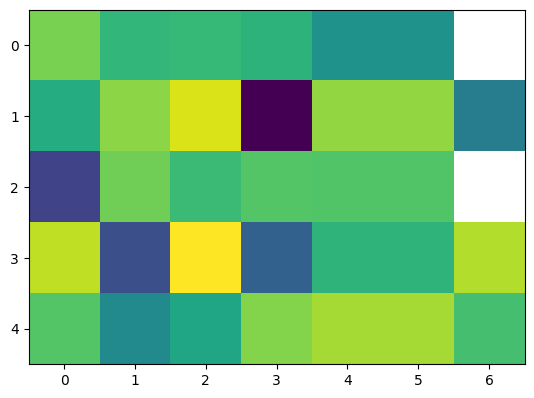

In [96]:
#uzmi sve retke i sve stupce osim zadnjeg stupca. naoravi logaritam po bazi 10 od njihovih apsolutnih vrijednosti. prikazi graficki
#tamnija boja = veca vrijednost
plt.imshow(np.log10(abs(df.iloc[:,:-1])))

In [98]:
#Promijenimo stupac aboveLOD
#ako je vrijednost u stupcu X veca od 0.01 neka se ispise ta vrijednost
#ako nije nek pise <LOD
#ne dodajemo novi stupac vec mijenjamo postojeci

df['aboveLOD']= df['X'].apply(lambda x: x if x > 0.01 else '<LOD')
df

,W,X,Y,Z,W-Y,WminY,logx,aboveLOD
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN,<LOD
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735,1.394778
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN,<LOD
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971,0.176405
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871,0.40419


In [99]:
df

,W,X,Y,Z,W-Y,WminY,logx,aboveLOD
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN,<LOD
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735,1.394778
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN,<LOD
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971,0.176405
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871,0.40419


In [100]:
#dodajmo novi stupac na temelju vrijednosti stupca W
#ako je vrijednost u W veca ili jednaka nuli neka pise P
#ako nije neka pise N

df['positive_nmb'] = df['W'].apply(lambda x: 'P' if x >= 0 else 'N')
df

,W,X,Y,Z,W-Y,WminY,logx,aboveLOD,positive_nmb
A,1.268048,-0.786733,0.805284,-0.736895,0.462763,0.462763,NaN,<LOD,P
B,-0.670811,1.394778,-2.124440,0.074599,1.453629,1.453629,0.332735,1.394778,N
C,-0.152607,-1.205066,0.844590,1.003764,-0.997197,-0.997197,NaN,<LOD,N
D,-1.847027,0.176405,-2.598922,-0.225918,0.751895,0.751895,-1.734971,0.176405,N
E,0.998140,0.404190,-0.612067,-1.341849,1.610207,1.610207,-0.905871,0.40419,P


Izbaciti stupac

axis=0 - vertikalno - brise redak

axis=1 - horizontalno - brise stupac

In [106]:
#izbaciti kolone koje smo prije dodavali
df.drop(['logx','WminY','W-Y','aboveLOD','positive_nmb'], axis=1, inPlace=True)
df

KeyError: "['logx', 'WminY', 'W-Y', 'aboveLOD', 'positive_nmb'] not found in axis"

In [105]:
df

,W,X,Y,Z
A,1.268048,-0.786733,0.805284,-0.736895
B,-0.670811,1.394778,-2.124440,0.074599
C,-0.152607,-1.205066,0.844590,1.003764
D,-1.847027,0.176405,-2.598922,-0.225918
E,0.998140,0.404190,-0.612067,-1.341849


In [107]:
#Izbaciti redak B ali nemoj koristiti inPlace=True
df.drop('B', axis=0)

,W,X,Y,Z
A,1.268048,-0.786733,0.805284,-0.736895
C,-0.152607,-1.205066,0.844590,1.003764
D,-1.847027,0.176405,-2.598922,-0.225918
E,0.998140,0.404190,-0.612067,-1.341849


In [108]:
df

,W,X,Y,Z
A,1.268048,-0.786733,0.805284,-0.736895
B,-0.670811,1.394778,-2.124440,0.074599
C,-0.152607,-1.205066,0.844590,1.003764
D,-1.847027,0.176405,-2.598922,-0.225918
E,0.998140,0.404190,-0.612067,-1.341849


#Shape of dataframe

In [110]:
#pretvorimo sve vrijednosti u dataframe-u u cojele brojeve (int)
#astype
df_as_int=df.astype(int)
df_as_int

,W,X,Y,Z
A,1,0,0,0
B,0,1,-2,0
C,0,-1,0,1
D,-1,0,-2,0
E,0,0,0,-1


In [111]:
df_as_int.dtypes

,0
W,int64
X,int64
Y,int64
Z,int64


In [112]:
df.dtypes

,0
W,float64
X,float64
Y,float64
Z,float64


Boolean

In [115]:
#pogledaj stupce W,X,Y iz df. Provjeri jesu li zapisane vrijednosti razlicite od nule
#nije jednako !=

df[['W','X','Y']] != 0

,W,X,Y
A,True,True,True
B,True,True,True
C,True,True,True
D,True,True,True
E,True,True,True


In [116]:
#pogledaj stupce W,x,Y iz df. Provjeri jesu li zapisane vrijednosti veće od nule. Spremi ovu masku kao novi objekt b_df

b_df = df[['W','X','Y']] > 0
b_df

,W,X,Y
A,True,False,True
B,False,True,False
C,False,False,True
D,False,True,False
E,True,True,False


In [117]:
df[b_df]
#ispisane su vrijednosti samo koje su pozitivne

,W,X,Y,Z
A,1.268048,NaN,0.805284,NaN
B,NaN,1.394778,NaN,NaN
C,NaN,NaN,0.844590,NaN
D,NaN,0.176405,NaN,NaN
E,0.998140,0.404190,NaN,NaN


In [119]:
#primjeni masku na df
#izbrisi sve retke i sve stupce koji imaju sve vrijednosti NaN
#Ostale NaN vrijednosti zamijeni s 0.0001

df[b_df].dropna(how='all', axis=0).dropna(how='all', axis=1).dropna(how='any', axis=0).dropna(how='all', axis=1)

""


In [120]:
#popuni stupac Z nulama
#na cijeli df primijeni ef-esle funkciju:
#ako je funkcija veca od 0.01 ispisi tu vrijednost a ako nij ispisi 0.001

df['Z'] =0
df = df.applymap(lambda x: x if x > 0.01 else 0.001)
df

/tmp/ipython-input-2810416543.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x if x > 0.01 else 0.001)


,W,X,Y,Z
A,1.268048,0.001000,0.805284,0.001
B,0.001000,1.394778,0.001000,0.001
C,0.001000,0.001000,0.844590,0.001
D,0.001000,0.176405,0.001000,0.001
E,0.998140,0.404190,0.001000,0.001


In [123]:
#ukloni stupac Z iz df
# zamijeni 0.001 s Nan
#ukloni stupce koji imaju sve vrijednosti NaN, A preostale Nan-ove ponovno zamijeni s 0.001

df.drop('Z',axis =1)
df.replace(0.001,np.nan)
df.dropna(how='all', axis=1).replace(np.nan,0.001)

,W,X,Y,Z
A,1.268048,0.001000,0.805284,0.001
B,0.001000,1.394778,0.001000,0.001
C,0.001000,0.001000,0.844590,0.001
D,0.001000,0.176405,0.001000,0.001
E,0.998140,0.404190,0.001000,0.001


In [124]:
#ponovno kreirajmo df

df= pd.DataFrame(randn(5,4),
                  index =['A','B','C','D','E'],
                  columns =['W','X','Y','Z'])
df

,W,X,Y,Z
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


In [125]:
#provjeri koje vrijednosti su iznad LOD
#prebroji vrijednosti u stupcima

lod = 0.001
df[df>lod].count(axis=1)

,0
A,2
B,3
C,2
D,3
E,1


In [126]:
#ostavi one retke koji u stupcu W imaju vrijednost vecu od -0.1
#ispisi samo vrijednosti stupca X iz tih preostalih redaka

df[df['W'] > -0.1]['X']

,X
A,-1.757384
B,-0.059863
D,0.124247
E,-1.611048


In [128]:
#ostavi one retke iz df koji imaju u stupcu W ili u stupcu Y vrijednosti vece od 0 --> koristi se |

df[(df['W']>0) | (df['Y']>0)]

#ako zelimo dvostruki uvjet i-i:
#df[(df['w]>0) & (df['Y']>0)]

,W,X,Y,Z
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


#Reset index

In [133]:
#resetiranje indexa -->  uvode se integer index, stari se micu
#koristimo inplace=True da tako ostane
#drop=False zadrzavamo imena indexe u novom stupcu

df.reset_index(drop=False)


,index,W,X,Y,Z
0,A,0.409292,-1.757384,1.369808,-1.817468
1,B,1.242679,-0.059863,0.937046,1.134634
2,C,-1.026726,0.558271,0.827187,-1.169211
3,D,0.765927,0.124247,-1.348389,0.898170
4,E,0.019643,-1.611048,-0.907536,-0.200693


#Set index

In [134]:
#zelimo promijeniti nazive kolona. provjerimo stare nazive kolona, zadamo nove

old_cols= df.columns.tolist()
old_cols

['W', 'X', 'Y', 'Z']

In [138]:
#.tolist ako zelimo napravit listu o toga
old_cols= df.columns
old_cols

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [139]:
new_cols= ['a','b','c','d']

In [140]:
df.columns= new_cols

In [141]:
df

,a,b,c,d
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


In [142]:
df

,a,b,c,d
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


In [143]:
df

,a,b,c,d
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


In [144]:
df.columns=old_cols

In [145]:
df

,W,X,Y,Z
A,0.409292,-1.757384,1.369808,-1.817468
B,1.242679,-0.059863,0.937046,1.134634
C,-1.026726,0.558271,0.827187,-1.169211
D,0.765927,0.124247,-1.348389,0.898170
E,0.019643,-1.611048,-0.907536,-0.200693


#Missing data

Null values (nedostajuce vrijednosti) se reprezentiraju kao NaN ili None

In [151]:
#kreiramo neki dataframe s nedostajucim vrijednostima
#u dictionary prvo ide kljuc pa vrijednost

In [148]:
d = {'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]}
d

{'A': [1, 2, nan], 'B': [5, nan, nan], 'C': [1, 2, 3]}

In [149]:
df = pd.DataFrame(data=d)

In [150]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


#Drop rows with null values

In [152]:
#Izbaci redak koji ima ikoju (any) NaN vrijednost

df.dropna(how='any',axis=0)

#any ide po defoltu ako izostavimo how=any rezultat ce biti isti

,A,B,C
0,1.0,5.0,1


#Drop columns with null values


In [153]:
#Izbaci kolonu sa svim NaN vrijednostima

df.dropna(how='all',axis=1)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


#Drop rows with null values adding treshold

In [156]:
#izbacimo retke koji imaju barem 2 NaN vrijednosti
#kada koristimo treshold nema how argumen

df.dropna(thresh=2, axis=0)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


#Fill missing values

In [158]:
#provjerimo srednju vrijednost po stupcima
df.mean(axis=0)

,0
A,1.5
B,5.0
C,2.0


In [159]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [160]:
#NaN mozemo zamijeniti na razne nacine:
#upisemo tekst

df.fillna(value='XXX')

,A,B,C
0,1.0,5.0,1
1,2.0,XXX,2
2,XXX,XXX,3


In [161]:
#upisemo neku funkciju

df.fillna(value=df.mean())

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,1.5,5.0,3


#group by

In [162]:
data ={'Chemist':['T','I','T','I','T','T'],
       'Lokacija':['zg','zd','zg','zd','zg','zg'],
       'Koncentracija':[0.002,0.012,0.02,0.006,0.002,0.004]}
data

{'Chemist': ['T', 'I', 'T', 'I', 'T', 'T'],
 'Lokacija': ['zg', 'zd', 'zg', 'zd', 'zg', 'zg'],
 'Koncentracija': [0.002, 0.012, 0.02, 0.006, 0.002, 0.004]}

In [163]:
#pretvorit dictionary u dataframe
df = pd.DataFrame(data)
df

,Chemist,Lokacija,Koncentracija
0,T,zg,0.002
1,I,zd,0.012
2,T,zg,0.020
3,I,zd,0.006
4,T,zg,0.002
5,T,zg,0.004


In [165]:
#Koje se vrijednosti pojavljuju u stupcu loaction?
#unique - sve jedinstvene vrijednosti koje se nalaze u tom dataframu za odredeni key

df['Lokacija'].unique()



array(['zg', 'zd'], dtype=object)

**groupby** dijeli podatke u grupe prema nekom kriteriju, a zatim na svakoj grupi zasebno radimo neku operaciju (mean, std,sum,count...)

In [167]:
#zelimo provjeriti kolika je stdev izmjerenih koncentracija prema gradovima
#(nesto od cega mozemo napraviti grupe) [numericki pdatci].operacija()

df.groupby('Lokacija')['Koncentracija'].std()

,Koncentracija
Lokacija,
zd,0.004243
zg,0.008718


In [169]:
#brzinska statistika - racuna se statistika svih numerickih varijebali

df.describe()

,Koncentracija
count,6.000000
mean,0.007667
std,0.007090
min,0.002000
25%,0.002500
50%,0.005000
75%,0.010500
max,0.020000


#Concatenation (spajanje)

In [170]:
#kreiramo df s random brojevima

df = pd.DataFrame(randn(5,4),
                  ['a','b','c','d','e'],
                  ['w','x','y','z'])
df

,w,x,y,z
a,-0.113233,1.392537,-0.601302,0.048414
b,1.813427,0.501955,-0.732467,-0.963586
c,-0.411393,1.141335,2.360534,-1.209054
d,-0.344814,-0.515232,0.039694,-0.352388
e,0.643093,-1.827484,-0.064586,0.971256


In [171]:
#izradimo i drugi data frame s apsolutnim brojevima prvog
#preimenujemo indexe

df2 = np.abs(df)
df2.index = ['a1','b1','c1','d1','e1']
df2


,w,x,y,z
a1,0.113233,1.392537,0.601302,0.048414
b1,1.813427,0.501955,0.732467,0.963586
c1,0.411393,1.141335,2.360534,1.209054
d1,0.344814,0.515232,0.039694,0.352388
e1,0.643093,1.827484,0.064586,0.971256


In [174]:
##provjera jesu li iste velicine oba dataframe-a
df.shape

(5, 4)

In [175]:
df2.shape

(5, 4)

In [177]:
#spajanje dva dataframe-a jedan pored drugoga --> bazivi kolone su duplicirani
# da smo imali iste indexe u oba data frame-a vrijednosti bi se pisale pod taj jedan index

df3 = pd.concat([df,df2], axis =1)
df3

,w,x,y,z,w,x,y,z
a,-0.113233,1.392537,-0.601302,0.048414,NaN,NaN,NaN,NaN
b,1.813427,0.501955,-0.732467,-0.963586,NaN,NaN,NaN,NaN
c,-0.411393,1.141335,2.360534,-1.209054,NaN,NaN,NaN,NaN
d,-0.344814,-0.515232,0.039694,-0.352388,NaN,NaN,NaN,NaN
e,0.643093,-1.827484,-0.064586,0.971256,NaN,NaN,NaN,NaN
a1,NaN,NaN,NaN,NaN,0.113233,1.392537,0.601302,0.048414
b1,NaN,NaN,NaN,NaN,1.813427,0.501955,0.732467,0.963586
c1,NaN,NaN,NaN,NaN,0.411393,1.141335,2.360534,1.209054
d1,NaN,NaN,NaN,NaN,0.344814,0.515232,0.039694,0.352388
e1,NaN,NaN,NaN,NaN,0.643093,1.827484,0.064586,0.971256


In [179]:
#Spajanje colona
#vertikalno spajanje(jedan ispod drugog) --> vrijednosti s istim nazivom kolone se upisuju u istu kolonu

df4 = pd.concat([df,df2], axis =0)
df4

,w,x,y,z
a,-0.113233,1.392537,-0.601302,0.048414
b,1.813427,0.501955,-0.732467,-0.963586
c,-0.411393,1.141335,2.360534,-1.209054
d,-0.344814,-0.515232,0.039694,-0.352388
e,0.643093,-1.827484,-0.064586,0.971256
a1,0.113233,1.392537,0.601302,0.048414
b1,1.813427,0.501955,0.732467,0.963586
c1,0.411393,1.141335,2.360534,1.209054
d1,0.344814,0.515232,0.039694,0.352388
e1,0.643093,1.827484,0.064586,0.971256


In [181]:
df4.describe()

,w,x,y,z
count,10.000000,10.000000,10.000000,10.000000
mean,0.491304,0.607165,0.480046,0.203934
std,0.788268,1.080707,1.087680,0.850127
min,-0.411393,-1.827484,-0.732467,-1.209054
25%,-0.056616,0.501955,-0.038516,-0.252188
50%,0.378104,0.828283,0.052140,0.200401
75%,0.643093,1.329736,0.699675,0.969339
max,1.813427,1.827484,2.360534,1.209054


#Sort

In [182]:
#sortiranje podataka prema porastu ili padu vrijednosti

df2

,w,x,y,z
a1,0.113233,1.392537,0.601302,0.048414
b1,1.813427,0.501955,0.732467,0.963586
c1,0.411393,1.141335,2.360534,1.209054
d1,0.344814,0.515232,0.039694,0.352388
e1,0.643093,1.827484,0.064586,0.971256


In [185]:
#ascending=true ako zelimo podatke sortirati uzlazno
#prema stupcu w su se poslozili i ostali redovi
df2.sort_values(by='w', ascending=True)

,w,x,y,z
a1,0.113233,1.392537,0.601302,0.048414
d1,0.344814,0.515232,0.039694,0.352388
c1,0.411393,1.141335,2.360534,1.209054
e1,0.643093,1.827484,0.064586,0.971256
b1,1.813427,0.501955,0.732467,0.963586


#Input and Output

CSV

In [186]:
#save to csv

df.to_csv('datoteka.csv')

In [189]:
#read csv
#index_col=0 da staviomo indexe u prvi stupac

pozvana = pd.read_csv('datoteka.csv', index_col=0)
pozvana

,w,x,y,z
a,-0.113233,1.392537,-0.601302,0.048414
b,1.813427,0.501955,-0.732467,-0.963586
c,-0.411393,1.141335,2.360534,-1.209054
d,-0.344814,-0.515232,0.039694,-0.352388
e,0.643093,-1.827484,-0.064586,0.971256


#Excel

In [190]:
#save as excel

df.to_excel('datoteka.xlsx')

In [193]:
#read excel

excel_data = pd.read_excel('datoteka.xlsx', index_col=0)
excel_data

,w,x,y,z
a,-0.113233,1.392537,-0.601302,0.048414
b,1.813427,0.501955,-0.732467,-0.963586
c,-0.411393,1.141335,2.360534,-1.209054
d,-0.344814,-0.515232,0.039694,-0.352388
e,0.643093,-1.827484,-0.064586,0.971256


#Clustermap

Za vizualizaciju podataka - fokus na statistickim grafovima

In [194]:
import seaborn as sns

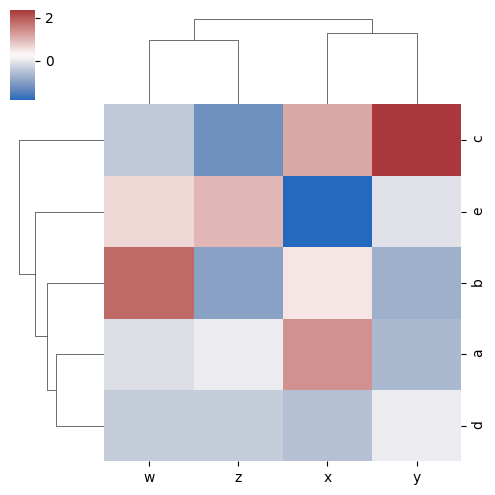

In [195]:
sns.clustermap(pozvana, figsize=(5,5), cmap='vlag')